In [21]:
import SLOPpy
from SLOPpy.subroutines.common import *
from SLOPpy.subroutines.spectral_subroutines import *
from SLOPpy.subroutines.io_subroutines import *
from SLOPpy.subroutines.common import *
from SLOPpy.subroutines.shortcuts import *
from SLOPpy.subroutines.plot_subroutines import *
#%matplotlib notebook
%matplotlib widget

In [22]:
# Import the os module
import os

# Get the current working directory
cwd = os.getcwd()

# Print the current working directory
print("Baseline working directory: {0}".format(cwd))

# Change the current working directory
os.chdir('/Users/malavolta/Astro/ExoAtmospheres/kelt-20/test_halhpha_redo2/')
print("Current working directory: {0}".format(os.getcwd()))



Baseline working directory: /Users/malavolta/Astro/ExoAtmospheres/kelt-20/test_halhpha_redo2
Current working directory: /Users/malavolta/Astro/ExoAtmospheres/kelt-20/test_halhpha_redo2


In [23]:
file_conf = 'Kelt20_transit.yml'
config_in = load_yaml_file(file_conf)

night_dict = from_config_get_nights(config_in)

night_list = night_dict
append_name = None

for key in night_list:
    print(key)

2018-07-12


### Change the night list here

In [24]:
night_list.pop('2017-08-16', None)
night_list.pop('2018-07-19', None)


### Instructions 
Starting from here you just need to copy the code from the plotting subroutines

  No interstellar lines correction available - is this expected?  

  Failed in retrieving processed data


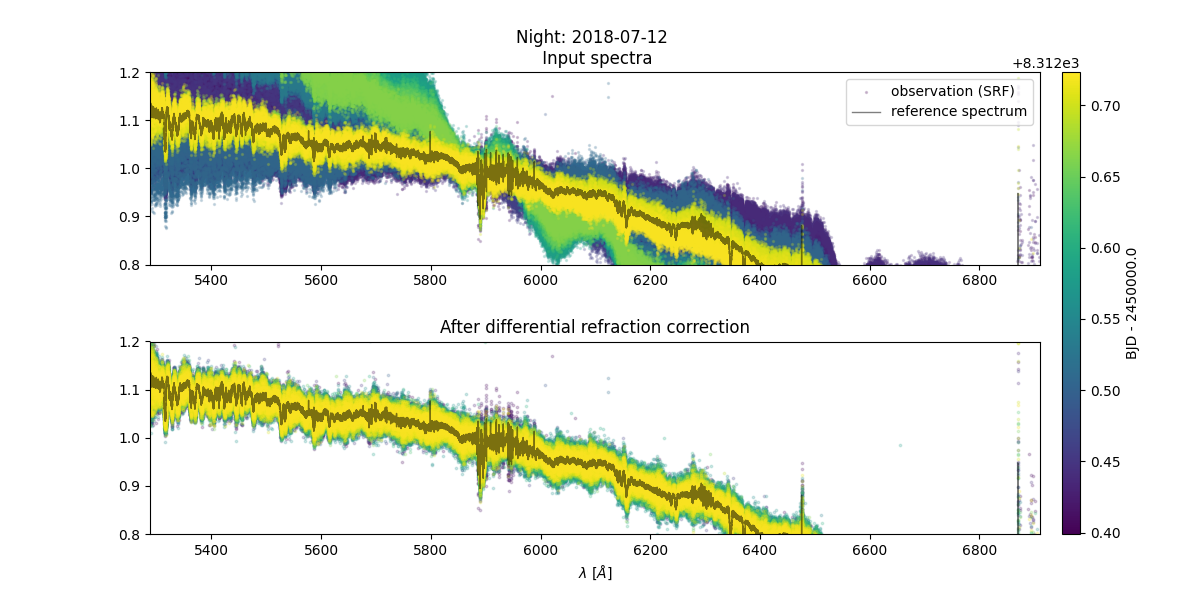

In [25]:
for night in night_list:

    refraction_dict = from_config_refraction(config_in, night)

    """ Retrieving the list of observations"""
    lists = load_from_cpickle('lists', config_in['output'], night)

    """ Retrieving the observations"""
    input_data = retrieve_observations(config_in['output'], night, lists['observations'],
                                       use_refraction=False, use_telluric=False)
    observational_pams = load_from_cpickle('observational_pams', config_in['output'], night)

    try:
        """ Retrieving the analysis"""
        if append_name:
            processed = load_from_cpickle('refraction_' + append_name + '_processed', config_in['output'], night)
            preparation = load_from_cpickle('refraction_' + append_name + '_preparation', config_in['output'],
                                            night)
            refraction = load_from_cpickle('refraction_' + append_name, config_in['output'], night)
        else:
            processed = load_from_cpickle('refraction_processed', config_in['output'], night)
            preparation = load_from_cpickle('refraction_preparation', config_in['output'], night)
            refraction = load_from_cpickle('refraction', config_in['output'], night)
    except:
        print("  Failed in retrieving processed data")

    approach = refraction_dict.get('approach', 'full_spectrum')

    colors_properties, colors_plot, colors_scatter = make_color_array_matplotlib3(lists, observational_pams)

    offset = 0.10

    y_limits = [0.8, 1.2]

    flag_e2ds = {}
    flag_coadd = {}
    for i, obs in enumerate(lists['observations']):

        shrink_factor = 4
        if input_data[obs]['n_orders'] > shrink_factor:
            factor = (input_data[obs]['n_orders'] * input_data[obs]['n_pixels']) \
                     // (input_data[obs]['n_pixels'] * shrink_factor)
            flag_e2ds[obs] = (np.random.choice(a=([False] * (factor-1)) + [True],
                                               size=(input_data[obs]['n_orders'], input_data[obs]['n_pixels'])))

            flag_coadd[obs] = \
                np.random.choice(a=([False] * factor) + [True],  size=input_data['coadd']['size'])

        else:
            flag_e2ds[obs] = np.ones([input_data[obs]['n_orders'], input_data[obs]['n_pixels']], dtype=bool)
            flag_coadd[obs] =  np.ones(input_data['coadd']['size'], dtype=bool)

    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(2, 2, width_ratios=[50, 1])

    ax1 = plt.subplot(gs[0, 0])
    ax2 = plt.subplot(gs[1, 0], sharex=ax1, sharey=ax1)
    cbax1 = plt.subplot(gs[:, 1])

    for i, obs in enumerate(lists['observations']):

        """  We slim down the plot  """

        if i == 0:
            ax1.scatter(preparation['coadd']['wave'][flag_coadd[obs]],
                        preparation[obs]['flux_rebinned_stellarRF'][flag_coadd[obs]] / preparation[obs]['rescaling'],
                        c=colors_scatter['mBJD'][obs], s=2, alpha=0.2, label='observation (SRF)')
        else:
            ax1.scatter(preparation['coadd']['wave'][flag_coadd[obs]],
                        preparation[obs]['flux_rebinned_stellarRF'][flag_coadd[obs]] / preparation[obs]['rescaling'],
                        c=colors_scatter['mBJD'][obs], s=2, alpha=0.2)

        ax2.scatter(processed['coadd']['wave'][flag_coadd[obs]],
                    processed[obs]['flux_rebinned_stellarRF_corrected'][flag_coadd[obs]] / preparation[obs]['rescaling'],
                    c=colors_scatter['mBJD'][obs], s=3, alpha=0.2)

    ax1.plot(preparation['coadd']['wave'], preparation['coadd']['rescaled'], c='k', lw=1, alpha=0.5,
             label='reference spectrum')
    ax2.plot(preparation['coadd']['wave'], preparation['coadd']['rescaled'], c='k', lw=1, alpha=0.5)

    ax1.set_xlim(processed['coadd']['wave'][0], processed['coadd']['wave'][-1])
    ax1.set_ylim(y_limits)
    ax2.set_ylim(y_limits)
    ax1.legend(loc=1)
    ax1.set_title('Night: {0:s} \n Input spectra'.format(night))
    ax2.set_title('After differential refraction correction')
    ax2.set_xlabel('$\lambda$ [$\AA$]')

    sm = plt.cm.ScalarMappable(cmap=colors_properties['cmap'], norm=colors_properties['norm']['mBJD'])
    sm.set_array([])  # You have to set a dummy-array for this to work...
    cbar = plt.colorbar(sm, cax=cbax1)
    cbar.set_label('BJD - 2450000.0')
    fig.subplots_adjust(wspace=0.05, hspace=0.4)
    plt.show()

    """
    PLOT
    """


  No interstellar lines correction available - is this expected?  

  Failed in retrieving processed data


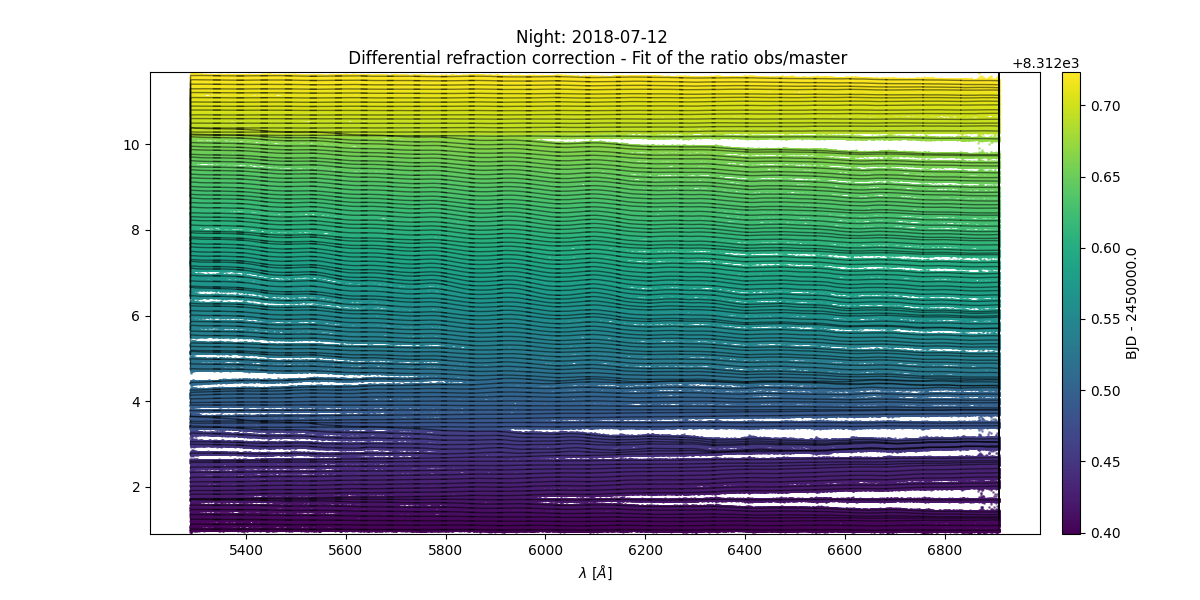

In [26]:
for night in night_list:

    refraction_dict = from_config_refraction(config_in, night)

    """ Retrieving the list of observations"""
    lists = load_from_cpickle('lists', config_in['output'], night)

    """ Retrieving the observations"""
    input_data = retrieve_observations(config_in['output'], night, lists['observations'],
                                       use_refraction=False, use_telluric=False)
    observational_pams = load_from_cpickle('observational_pams', config_in['output'], night)

    try:
        """ Retrieving the analysis"""
        if append_name:
            processed = load_from_cpickle('refraction_' + append_name + '_processed', config_in['output'], night)
            preparation = load_from_cpickle('refraction_' + append_name + '_preparation', config_in['output'],
                                            night)
            refraction = load_from_cpickle('refraction_' + append_name, config_in['output'], night)
        else:
            processed = load_from_cpickle('refraction_processed', config_in['output'], night)
            preparation = load_from_cpickle('refraction_preparation', config_in['output'], night)
            refraction = load_from_cpickle('refraction', config_in['output'], night)
    except:
        print("  Failed in retrieving processed data")


    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(1, 2, width_ratios=[50, 1])
    ax = plt.subplot(gs[0, 0])
    cbax1 = plt.subplot(gs[:, 1])

    for i, obs in enumerate(lists['observations']):

        if i == 0:
            offset = np.std(processed[obs]['ratio'][refraction[obs]['fit_flag']].flatten()) * 6
            average = np.average(processed[obs]['ratio'][refraction[obs]['fit_flag']].flatten())
            y_limits = [average - offset, average + offset]

        if approach == 'full_spectrum':
            flag = flag_coadd[obs] & refraction[obs]['fit_flag']
            wave = refraction['wave']

        elif approach == 'individual_order':
            flag = flag_e2ds[obs] & refraction[obs]['fit_flag']
            wave = input_data[obs]['wave']

        ax.scatter(wave[flag],
                   processed[obs]['ratio'][flag] + offset * i,
                   c=colors_scatter['mBJD'][obs], s=1, alpha=0.50, zorder=2)

        ax.scatter(wave[~refraction[obs]['fit_flag']],
                   processed[obs]['ratio'][~refraction[obs]['fit_flag']] + offset * i,
                   c='k', s=2, alpha=0.1, zorder=1)

        for order in range(0, input_data[obs]['n_orders']):

            ax.plot(input_data[obs]['wave'][order, :],
                    refraction[obs]['fit_e2ds'][order, :] + offset * i,
                    c='k', lw=1, alpha=0.5, zorder=5)

    y_limits_offset = [min(y_limits[0] + offset * i, y_limits[0]),
                       max(y_limits[1] + offset * i, y_limits[1])]

    ax.set_ylim(y_limits_offset)
    ax.set_xlabel('$\lambda$ [$\AA$]')
    #ax.legend(loc=3)
    ax.set_title('Night: {0:s} \n Differential refraction correction - Fit of the ratio obs/master'.format(night))

    sm = plt.cm.ScalarMappable(cmap=colors_properties['cmap'], norm=colors_properties['norm']['mBJD'])
    sm.set_array([])  # You have to set a dummy-array for this to work...
    cbar = plt.colorbar(sm, cax=cbax1)
    cbar.set_label('BJD - 2450000.0')
    fig.subplots_adjust(wspace=0.05, hspace=0.4)
    plt.show()



  No interstellar lines correction available - is this expected?  

  Failed in retrieving processed data
  No interstellar lines correction available - is this expected?  
  Telluric correction: applied 

 ***  full_spectrum  *** 


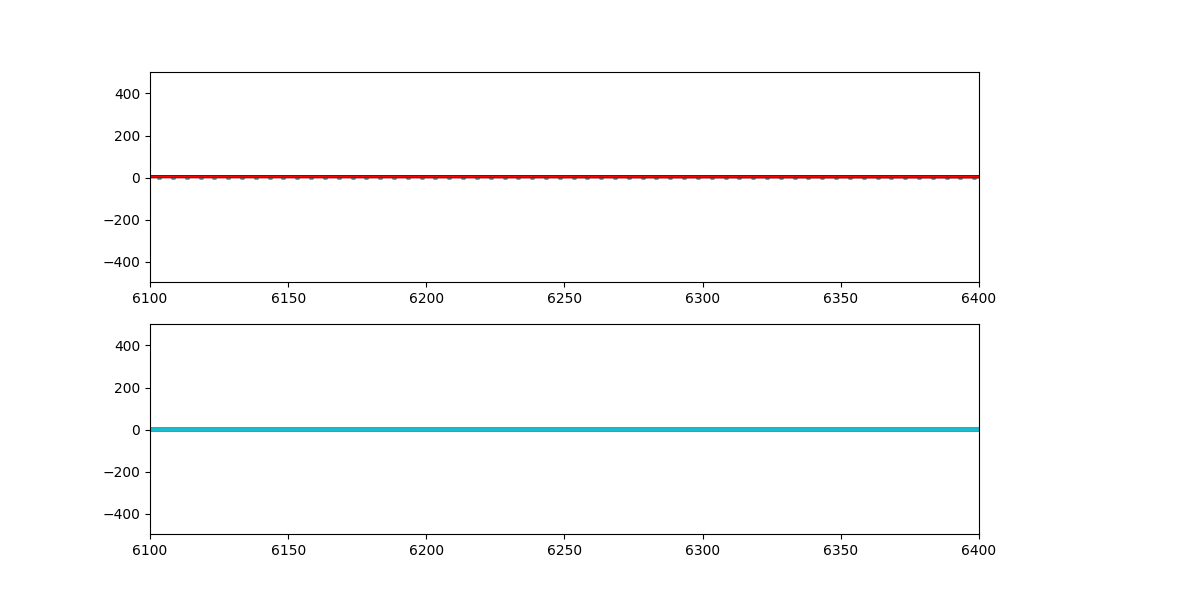

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


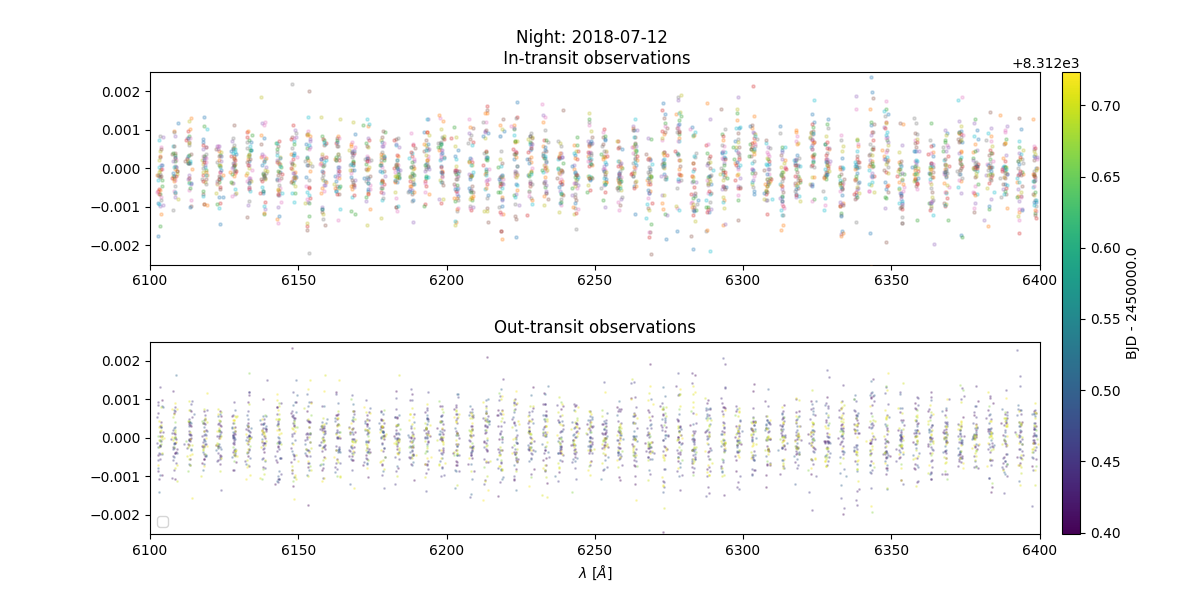

In [32]:

"""
PLOT: residuals of the fit
"""

for night in night_list:

    refraction_dict = from_config_refraction(config_in, night)

    """ Retrieving the list of observations"""
    lists = load_from_cpickle('lists', config_in['output'], night)

    """ Retrieving the observations"""
    input_data = retrieve_observations(config_in['output'], night, lists['observations'],
                                       use_refraction=False, use_telluric=False)
    observational_pams = load_from_cpickle(
        'observational_pams', config_in['output'], night)

    try:
        """ Retrieving the analysis"""
        if append_name:
            processed = load_from_cpickle(
                'refraction_' + append_name + '_processed', config_in['output'], night)
            preparation = load_from_cpickle('refraction_' + append_name + '_preparation', config_in['output'],
                                            night)
            refraction = load_from_cpickle(
                'refraction_' + append_name, config_in['output'], night)
        else:
            processed = load_from_cpickle(
                'refraction_processed', config_in['output'], night)
            preparation = load_from_cpickle(
                'refraction_preparation', config_in['output'], night)
            refraction = load_from_cpickle(
                'refraction', config_in['output'], night)
    except:
        print("  Failed in retrieving processed data")

    input_data = retrieve_observations(config_in['output'], night, lists['observations'],
                                        use_refraction=False)


    approach=refraction_dict.get('approach', 'full_spectrum')
    print(' *** ', approach, ' *** ')
    step_size=5.00

    refraction['binned']={}
    refraction['binned']['wave']=np.arange(
        refraction['wave'][0], refraction['wave'][-1], step_size, dtype = np.double)

    refraction['binned'][
        'size']=np.size(refraction['binned']['wave'])
    refraction['binned']['step']=np.ones(refraction['binned']['size'], dtype = np.double)  * step_size



    if True:


        fig = plt.figure(figsize=(12, 6))
        gs = GridSpec(2, 2, width_ratios=[50, 1])
        ax1 = plt.subplot(gs[0, 0])
        ax2 = plt.subplot(gs[1, 0], sharex=ax1, sharey=ax1)

        for i_obs, obs in enumerate(lists['transit_full']):
            if i_obs < 20: continue
            refraction[obs]['binned_ratio'] = \
                        rebin_1d_to_1d(preparation['coadd']['wave'],
                                        preparation['coadd']['step'],
                                        processed[obs]['ratio'],
                                        refraction['binned']['wave'],
                                        refraction['binned']['step'],
                                        preserve_flux=False)

            # ax1.scatter(refraction['wave'], processed[obs]['ratio']+i_obs/10, s=2,
            # alpha=0.5)
            ax1.scatter(refraction['binned']['wave'],
                        refraction[obs]['binned_ratio']+i_obs/10, s=5)
            ax1.plot(refraction['wave'], refraction[obs]
                    ['fit_s1d']+i_obs/10, c='k')
            ax2.scatter(refraction['wave'], processed[obs]['ratio'] -
                        refraction[obs]['fit_s1d']+i_obs/10, s=2, alpha=0.5)

            wave = refraction['binned']['wave']
            """ picking the number of knots """
            nknots = ((np.amax(wave) - np.amin(wave)) / 10)
            """ picking the indices of the knots"""
            idx_knots = (np.arange(1, len(wave) - 1,
                        (len(wave) - 2.) / nknots)).astype('int')
            """ passing from indices to knots values """
            knots = wave[idx_knots]
            coeff = \
                sci_int.splrep(
                    wave,
                    refraction[obs]['binned_ratio'],
                    task = -1,
                    k = 3,
                    t = knots)

            fit_s1d=sci_int.splev(wave, coeff)
            refraction[obs]['fit_s1d'] = sci_int.splev(preparation['coadd']['wave'], coeff)

            #spl = sci_int.LSQUnivariateSpline(wave, refraction[obs]['binned_ratio'],knots, k=3)
            #fit_s1d=spl(wave)

            #refraction[obs]['fit_s1d'] = spl(preparation['coadd']['wave'])
            ax1.plot(wave, fit_s1d+i_obs/10, c = 'r')


        ax1.set_xlim(6100, 6400)
        plt.show()

    else:

        for i_obs, obs in enumerate(lists['observations']):
                wave = preparation['coadd']['wave']
                """ picking the number of knots """
                nknots = ((np.amax(wave) - np.amin(wave)) / 10)
                """ picking the indices of the knots"""
                idx_knots = (np.arange(1, len(wave) - 1,
                            (len(wave) - 2.) / nknots)).astype('int')
                knots = wave[idx_knots]

                spl = sci_int.LSQUnivariateSpline(preparation['coadd']['wave'], processed[obs]['ratio'], knots, k=5)
                refraction[obs]['fit_s1d'] = spl(preparation['coadd']['wave'])



    #if 'binned' not in refraction:
    #    refraction['binned']={}
    #    refraction['binned']['wave']=np.arange(refraction['wave'][0],
    #                                             refraction['wave'][-1],
    #                                             step_size, dtype = np.double)

    #    refraction['binned']['size']=np.size(refraction['binned']['wave'])
    #    refraction['binned']['step']=np.ones(refraction['binned']['size'], dtype = np.double) * step_size



    bjd=[]
    am=[]
    for i, obs in enumerate(lists['observations']):

        processed[obs]['residuals']=processed[obs]['ratio'] - refraction[obs]['fit_s1d']

        bjd.append(observational_pams[obs]['BJD'] - 2450000.0)
        am.append(observational_pams[obs]['AIRMASS'])

        # if 'binned_residuals' in refraction[obs]:
        #    continue

        if approach == 'full_spectrum':

            refraction[obs]['binned_residuals']=rebin_1d_to_1d(
                preparation['coadd']['wave'],
                                        preparation['coadd']['step'],
                                        processed[obs]['residuals'],
                                        refraction['binned']['wave'],
                                        refraction['binned']['step'],
                                        preserve_flux = False)
        elif approach == 'individual_order':

            refraction[obs]['binned_residuals']=rebin_2d_to_1d(
                input_data[obs]['wave'],
                               input_data[obs]['step'],
                               processed[obs]['residuals'],
                               np.ones_like(processed[obs]['residuals']),
                               refraction['binned']['wave'],
                               refraction['binned']['step'],
                               rv_shift = 0.0000,
                               preserve_flux = False)

    color_cmap=plt.cm.viridis
    color_norm=plt.Normalize(vmin = bjd[0], vmax = bjd[-1])
    colors=color_cmap(color_norm(np.asarray(bjd)))
    fig=plt.figure(figsize = (12, 6))

    gs=GridSpec(2, 2, width_ratios = [50, 1])
    ax1=plt.subplot(gs[0, 0])
    ax2=plt.subplot(gs[1, 0], sharex = ax1, sharey = ax1)
    cbax1=plt.subplot(gs[:, 1])

    for i_obs, obs in enumerate(lists['transit_full']):
        #if i_obs < 20: continue

        # color = [color_cmap(color_norm(observational_pams[obs]['BJD'] - 2450000.0))[:-1]]

        ax1.scatter(np.random.normal(refraction['binned']['wave'], step_size/10.),refraction[obs]['binned_residuals'],s=5, zorder=3, alpha=0.25)# c=color, s=1, zorder=3, alpha=0.25)

    for i_obs, obs in enumerate(lists['transit_out']):

        color = [color_cmap(color_norm(observational_pams[obs]['BJD'] - 2450000.0))[:-1]]
        ax2.scatter(np.random.normal(refraction['binned']['wave'], step_size/10.),refraction[obs]['binned_residuals'],c=color, s=1, zorder=3, alpha=0.25)

    ax1.set_ylim(-0.0025, 0.0025)
    ax1.set_xlim(6100, 6400)

    ax2.set_xlabel('$\lambda$ [$\AA$]')
    ax2.legend(loc=3)
    ax1.set_title('Night: {0:s} \n In-transit observations'.format(night))
    ax2.set_title('Out-transit observations')

    sm = plt.cm.ScalarMappable(cmap=color_cmap, norm=color_norm)
    sm.set_array([])  # You have to set a dummy-array for this to work...
    cbar = plt.colorbar(sm, cax=cbax1)
    cbar.set_label('BJD - 2450000.0')
    fig.subplots_adjust(wspace=0.05, hspace=0.4)

    plt.show()






<IPython.core.display.Javascript object>


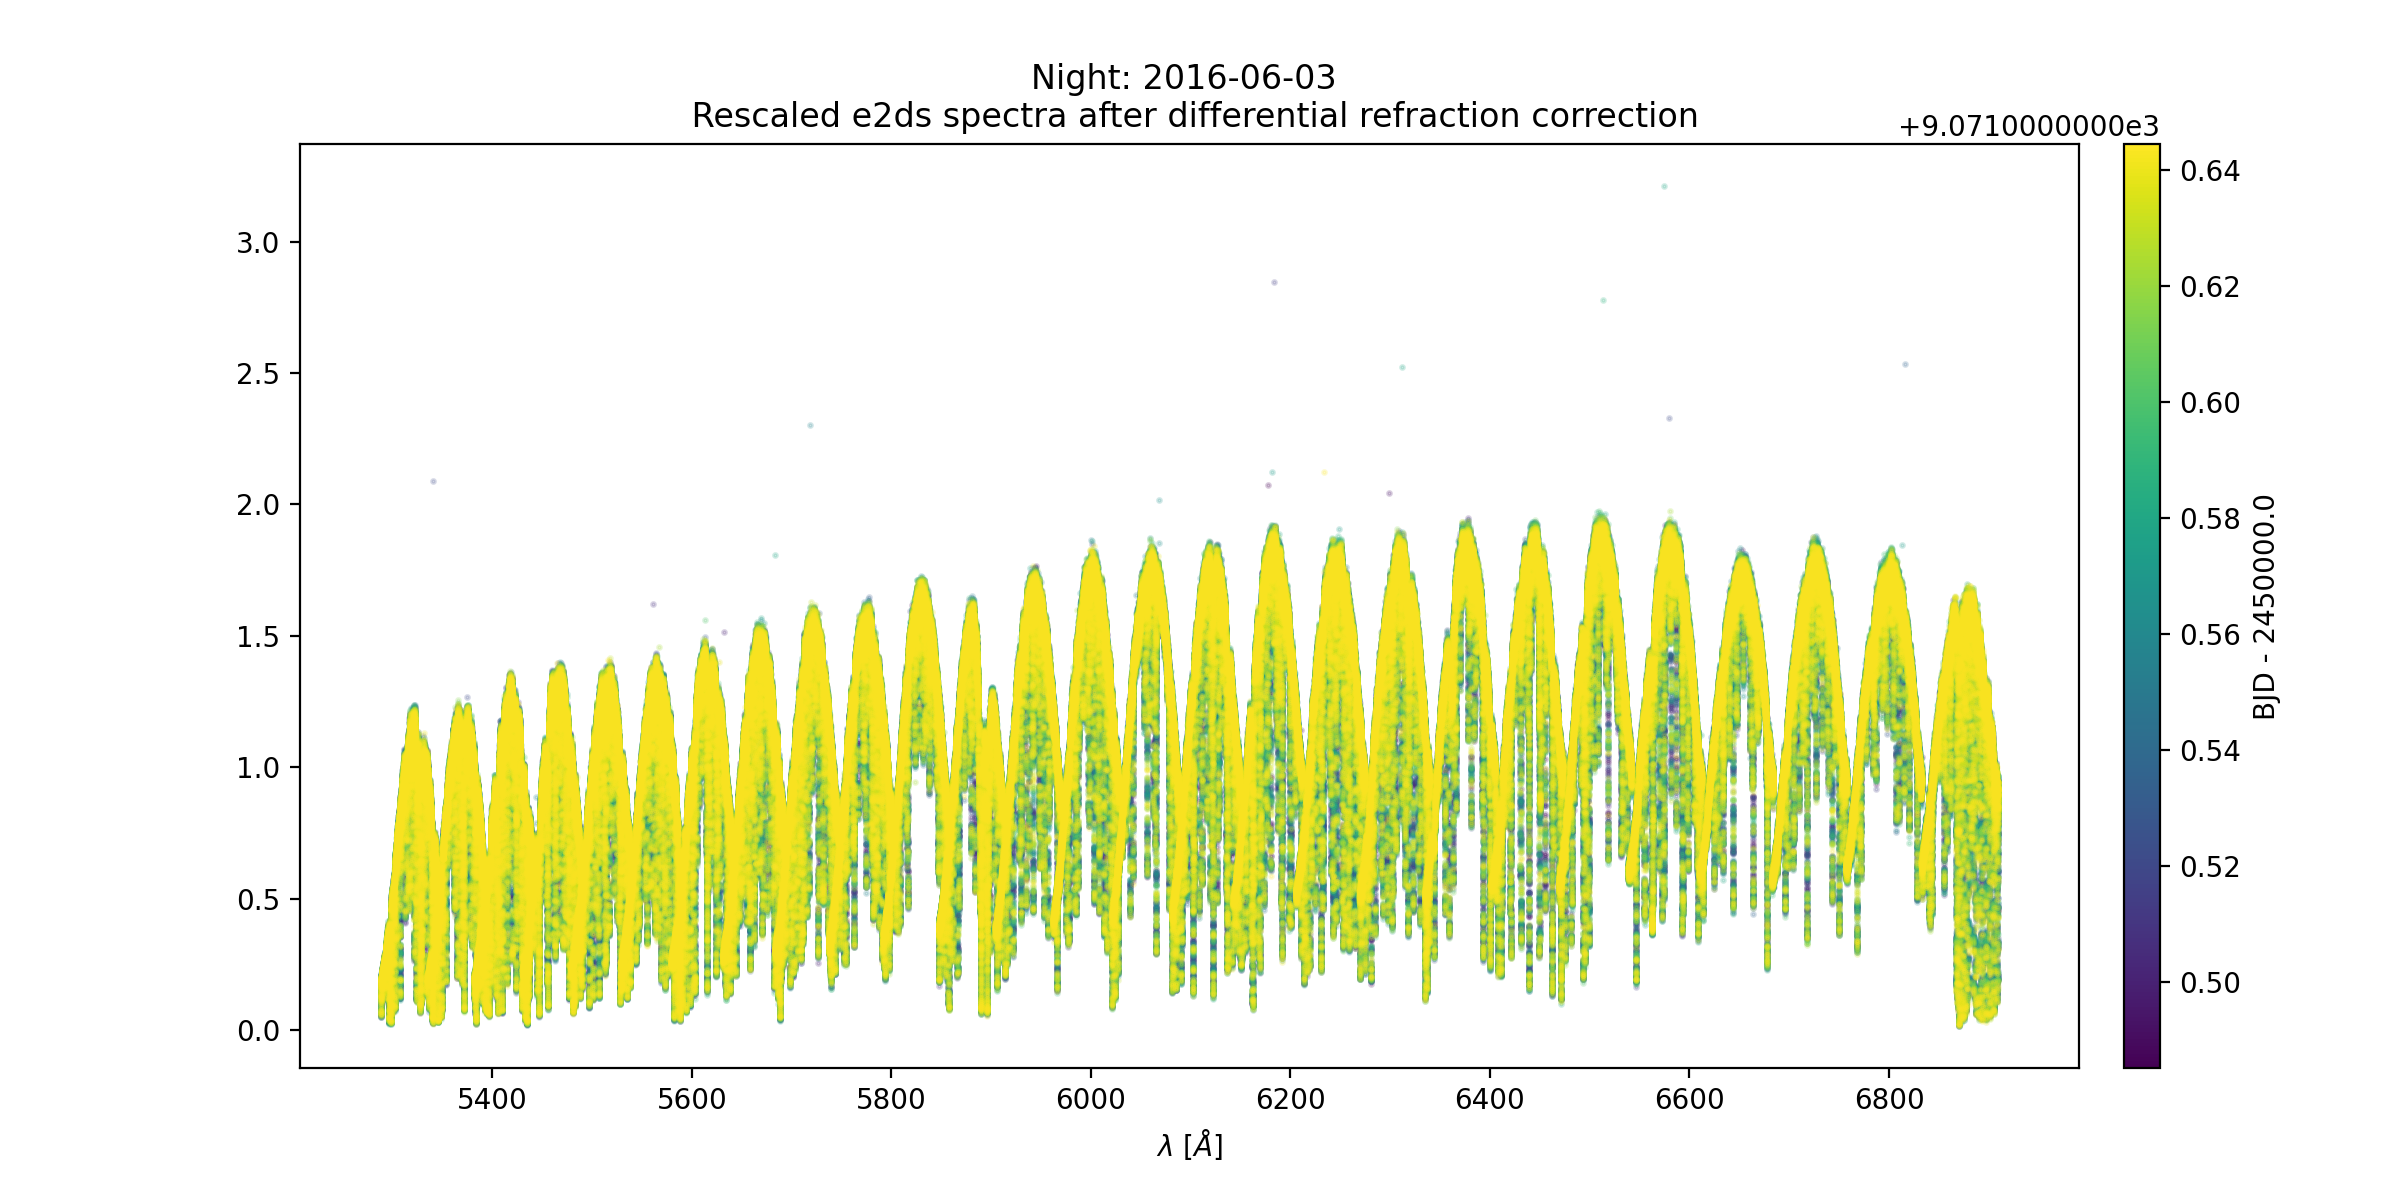

<IPython.core.display.Javascript object>


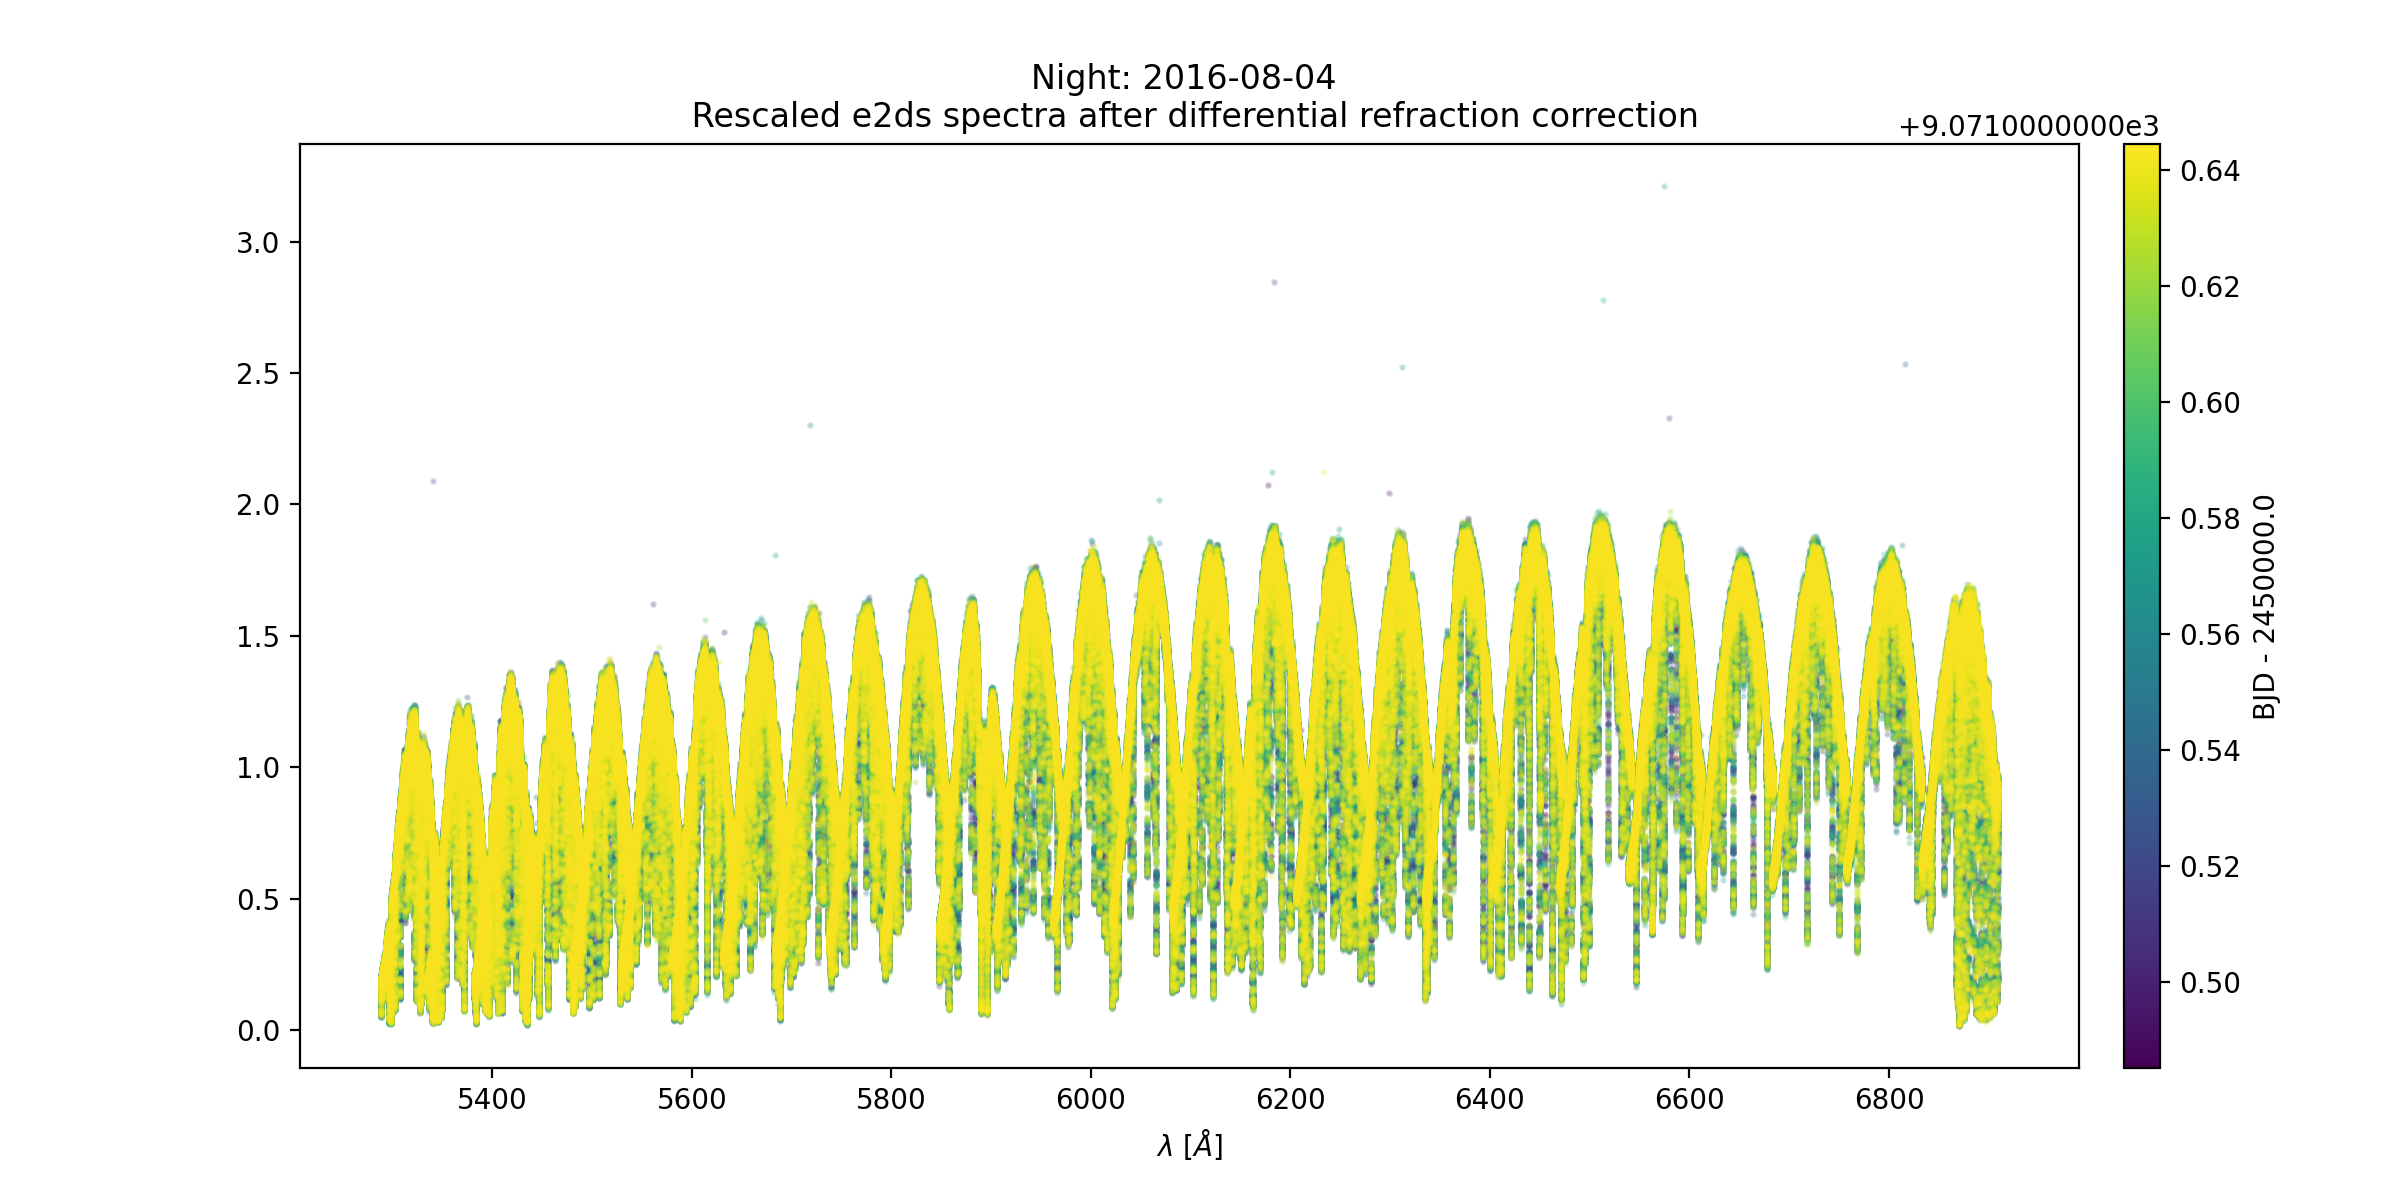

<IPython.core.display.Javascript object>


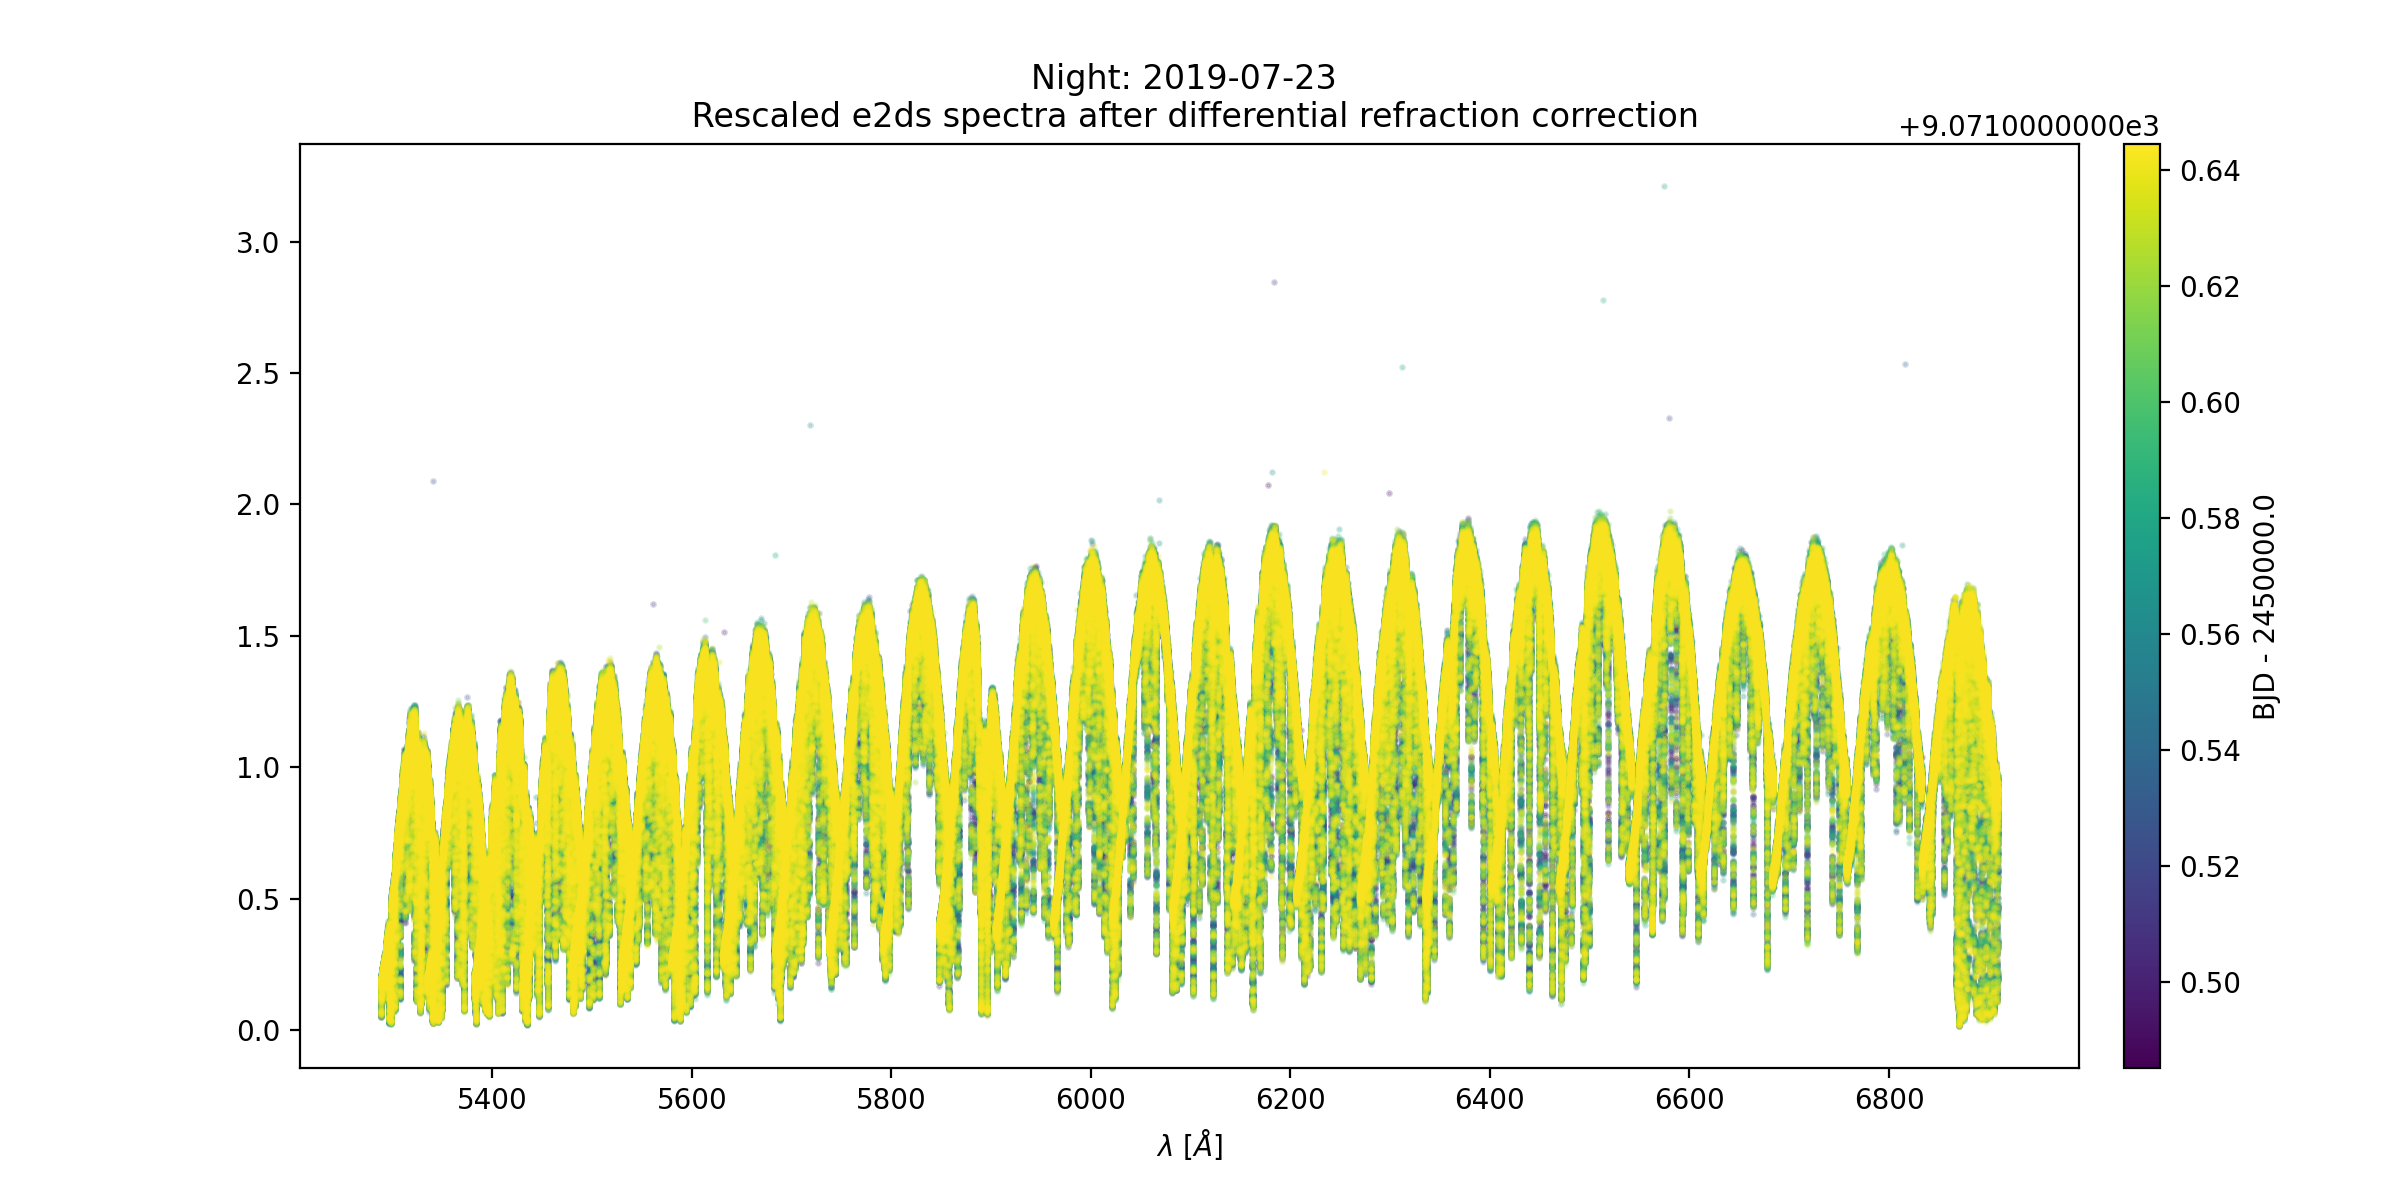

<IPython.core.display.Javascript object>


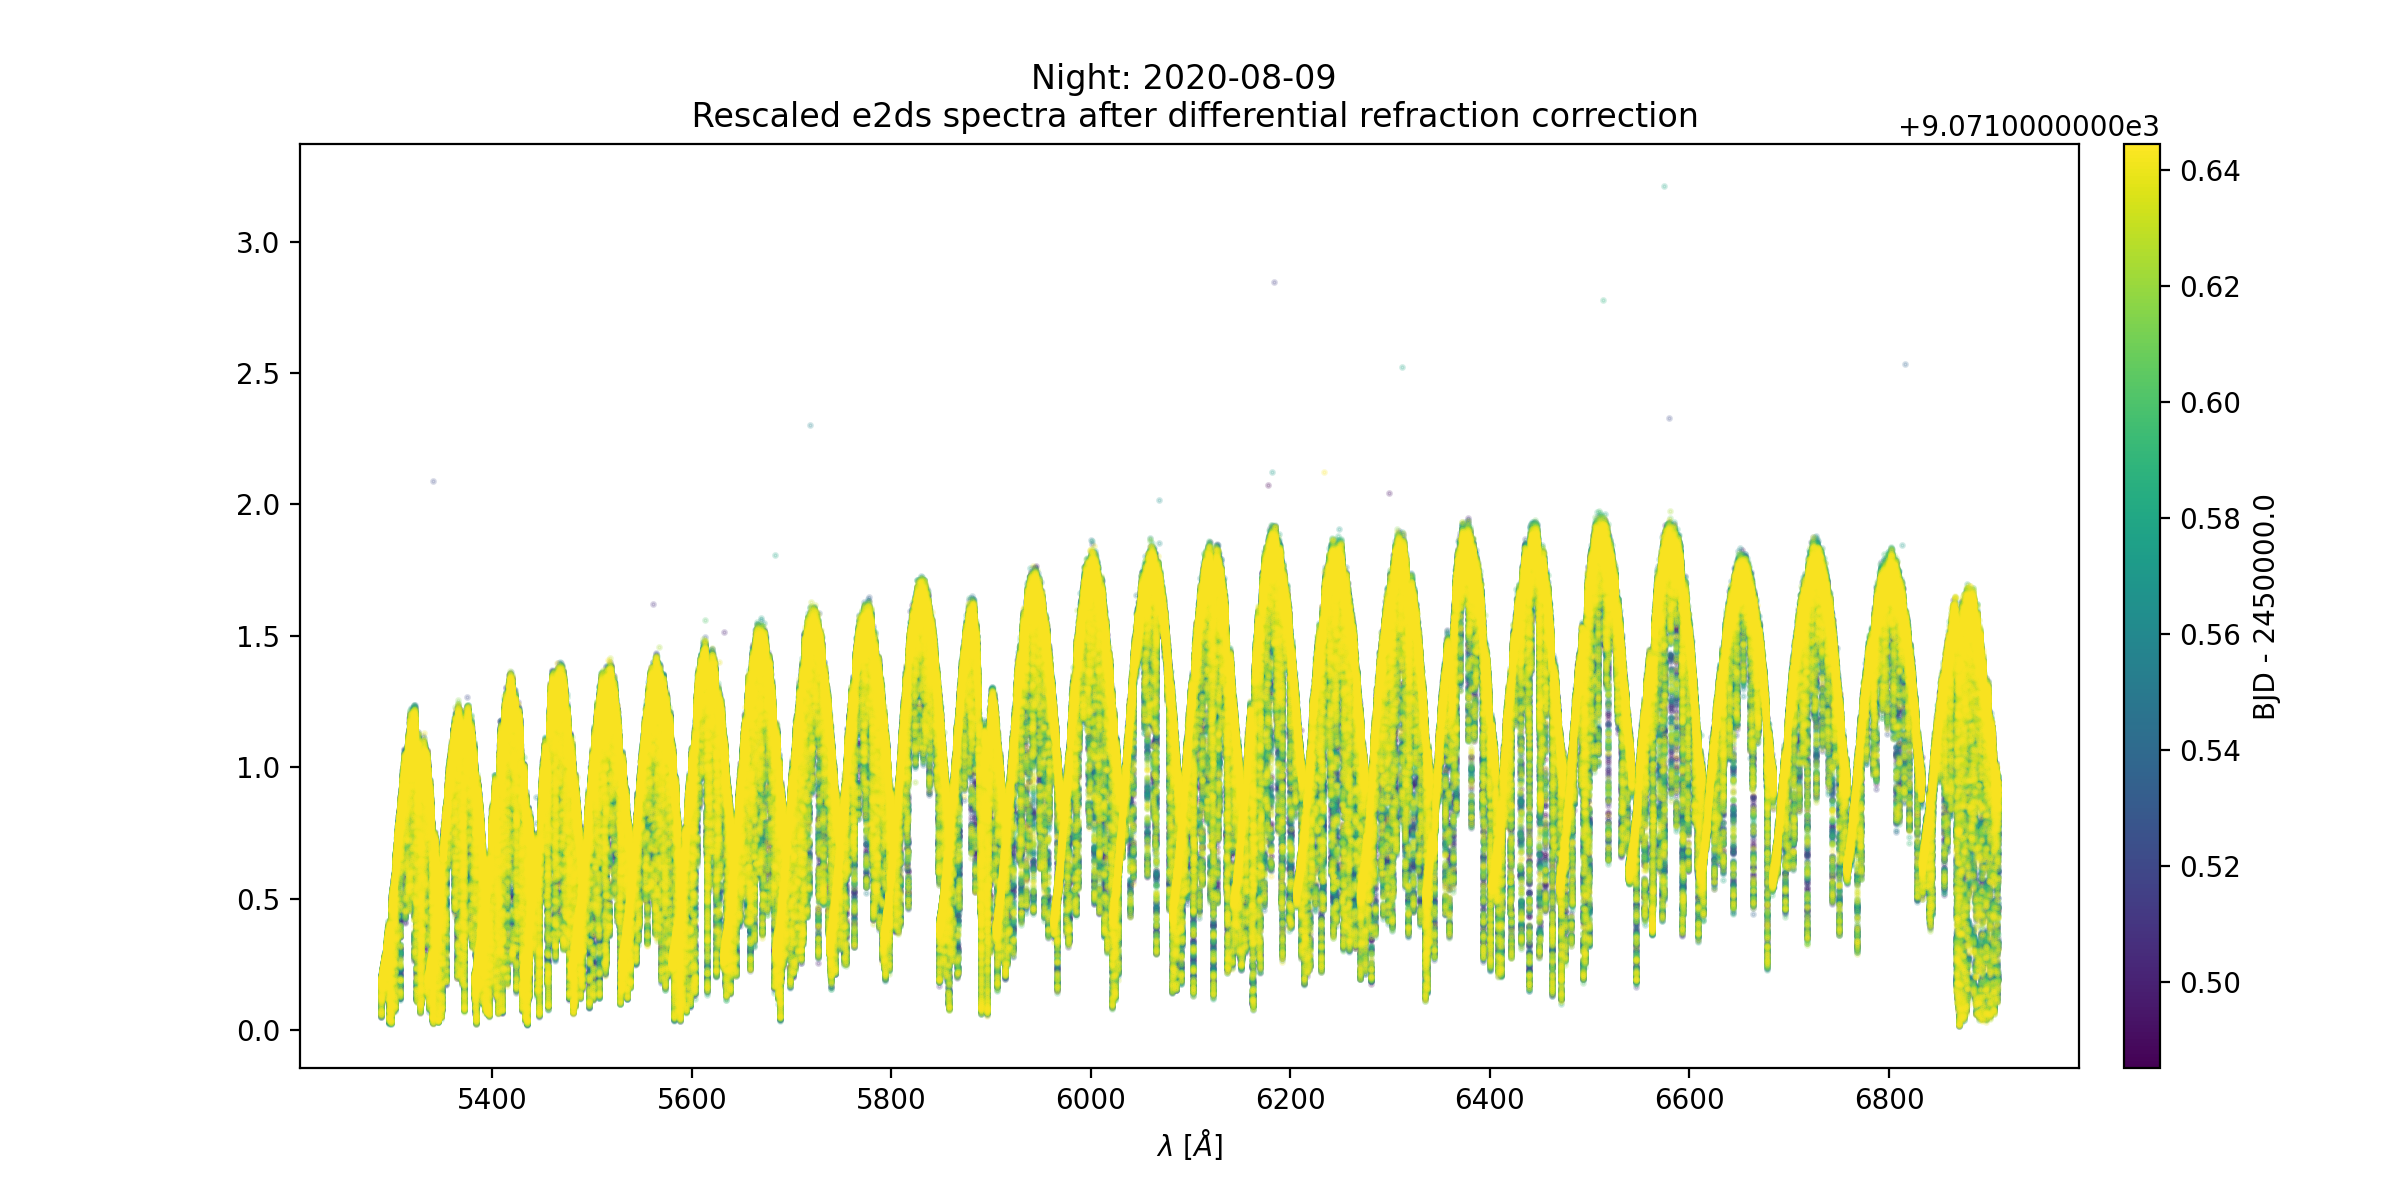

In [16]:



for night in night_list:
    """ 
    PLOT: corrected e2ds
    """

    fig = plt.figure(figsize=(12, 6))
    gs = GridSpec(1, 2, width_ratios=[50, 1])
    ax = plt.subplot(gs[0, 0])
    cbax1 = plt.subplot(gs[:, 1])

    for i, obs in enumerate(lists['observations']):

        e2ds_corrected = input_data[obs]['e2ds'] / refraction[obs]['fit_e2ds']

        ax.scatter(input_data[obs]['wave'],
                   e2ds_corrected / preparation[obs]['rescaling'],
                   c=colors_scatter['mBJD'][obs], s=2, alpha=0.20)

        # for order in range(0, np.size(input_data[obs]['wave'][:, 0])):
        #
        #    ax.plot(input_data[obs]['wave'][order, :],
        #            refraction[obs]['fit_e2ds'][order, :],
        #            c=color_array, lw=1)

    ax.set_xlabel('$\lambda$ [$\AA$]')
    ax.set_title('Night: {0:s} \n Rescaled e2ds spectra after differential refraction correction'.format(night))

    sm = plt.cm.ScalarMappable(cmap=colors_properties['cmap'], norm=colors_properties['norm']['mBJD'])
    sm.set_array([])  # You have to set a dummy-array for this to work...
    cbar = plt.colorbar(sm, cax=cbax1)
    cbar.set_label('BJD - 2450000.0')
    fig.subplots_adjust(wspace=0.05, hspace=0.4)
    plt.show()